In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
data_L=pd.read_csv("L.csv")
data_i=pd.read_csv("i.csv")

In [4]:
I=np.array(data_i.iloc[:,1:])
L=np.array(data_L.iloc[:,1:])

In [5]:
#这里q和c虽然是向量，但是由于qi和ci都是一样的，所以用一个值来表示。
def qVector(a,s):
    return a+(1-a)*abs(s-1)
def cVector(q,δ,ε,s):
    return δ*q/(ε*(q-abs(s-1)))

In [6]:
def xVector(θ,η):
    return np.add(θ,η)

In [7]:
s_set=np.linspace(0.8,1.2,41)
s_set=np.array(s_set)
s_set

array([0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 ,
       0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01,
       1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1 , 1.11, 1.12,
       1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 ])

In [8]:
h=0.05
#s=0.8#eg
δ=1
ε=0.1
a=10**-6
#L
# q=qVector(a,s)
# c=cVector(q,δ,ε,s)

In [9]:
conver_point_var=[]
k_set_ave=[]
for s in s_set:
    conver_point=[]
    k_set=[]
    q=qVector(a,s)
    c=cVector(q,δ,ε,s)
    for i in range(10**4):
        k=0
        θ=I
        while np.max(θ[:,k])-np.min(θ[:,k])>10**-2:
            θ_next=np.zeros([1,50],dtype=np.int)
            b=c*(q**k)
            η=np.random.laplace(0,b , 50)
            θ_next=θ[:,k]-h*np.dot(L,xVector(θ[:,k],η).reshape(50,1)).T+s*η
            θ_next=np.array(θ_next)
            θ=np.append(θ,θ_next.reshape(50,1),axis=1)
            k=k+1
        k_set.append(k)
        conver_point.append(np.mean(θ[:,-1]))
    conver_point_var.append(np.var(np.array(conver_point)))
    k_set_ave.append(np.mean(np.array(k_set)))


In [10]:
conver_point_var

[165460289085.64145,
 148552550096.795,
 137388148374.9864,
 120915063935.41307,
 108971527869.66374,
 92148163775.1815,
 81566380479.4722,
 70001053103.28146,
 58141931339.32889,
 48911435343.62056,
 41268868969.513535,
 32469458670.49615,
 26153754013.232395,
 19618173165.220867,
 14397810021.907106,
 10125001067.9187,
 6347992109.198629,
 3617419208.2580304,
 1624952991.0061605,
 399964732.0912407,
 4.016945947817979,
 424760987.98998576,
 1730053531.6994696,
 4041258050.702222,
 7558008769.810033,
 12302701528.96693,
 18324065886.39733,
 25988796524.317738,
 35659011037.23573,
 47534226252.008026,
 59861698541.12218,
 76430961501.74284,
 96693469903.88553,
 119793282992.80663,
 141406140166.39264,
 170538501111.9243,
 201694319482.15768,
 233345102001.162,
 279236768657.3938,
 321278670927.83386,
 375436692004.9138]

In [11]:
k_set_ave

[100.9332,
 100.5988,
 100.3469,
 100.1028,
 99.7813,
 99.346,
 98.9916,
 98.6569,
 98.1898,
 97.735,
 97.1949,
 96.6649,
 96.128,
 95.3607,
 94.6228,
 93.5748,
 92.5284,
 90.9698,
 89.0576,
 85.2993,
 39.4339,
 85.46,
 89.1337,
 91.3838,
 93.0353,
 94.3075,
 95.3696,
 96.3532,
 97.0445,
 97.8183,
 98.5522,
 99.0664,
 99.7867,
 100.2374,
 100.8025,
 101.2524,
 101.7554,
 102.2112,
 102.6298,
 103.0361,
 103.4383]

In [12]:
conver_point_var=np.array(conver_point_var)
k_set_ave=np.array(k_set_ave)

<IPython.core.display.Javascript object>


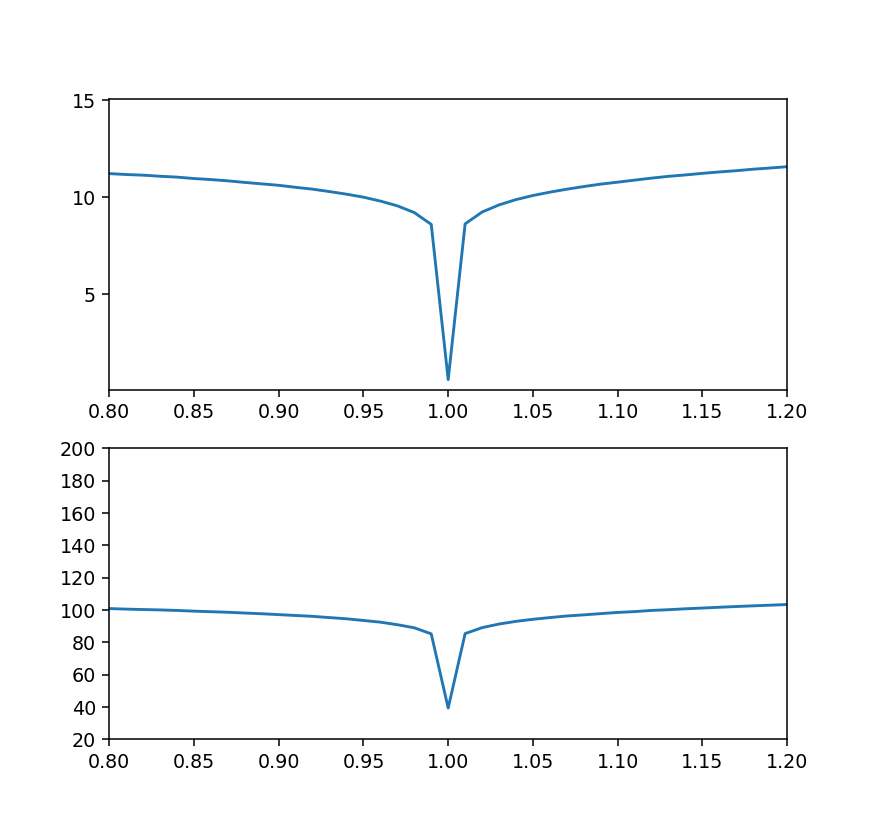

In [17]:
fig = plt.figure() 
ax1 = fig.add_subplot(2, 1, 1)
ax1.set_ylim(0,15)#10^10的对数
ax1.set_xlim(0.8,1.2)

ax2 = fig.add_subplot(2, 1, 2)
ax2.set_ylim(20,200)
ax2.set_xlim(0.8,1.2)



x1_major_locator=plt.MultipleLocator(0.05)
y1_major_locator=plt.MultipleLocator(5)
x2_major_locator=plt.MultipleLocator(0.05)
y2_major_locator=plt.MultipleLocator(20)


ax1.xaxis.set_major_locator(x1_major_locator)
ax1.yaxis.set_major_locator(y1_major_locator)

ax2.xaxis.set_major_locator(x2_major_locator)
ax2.yaxis.set_major_locator(y2_major_locator)


In [18]:
def figureA():
    x1=np.linspace(0.8,1.2,41,dtype=np.float)
    y1=np.log10(conver_point_var[np.round(x1*100).astype(int)-80])
    ax1.plot(x1,y1)
def figureB():
    x2=np.linspace(0.8,1.2,41,dtype=np.float)
    y2=k_set_ave[np.round(x2*100).astype(int)-80]
    ax2.plot(x2,y2)

In [19]:
figureA()

In [20]:
figureB()

In [19]:
np.linspace(0,40,41,dtype=np.int)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40])

In [29]:
np.array(np.linspace(0.8,1.2,41)*100-80,dtype=np.int)

array([ 0,  1,  2,  3,  4,  5,  5,  6,  7,  8,  9, 10, 12, 13, 14, 14, 15,
       16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 30, 32, 32,
       34, 34, 35, 36, 37, 38, 39])

In [118]:
np.linspace(0.8,1.2,41,dtype=np.float)

array([0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 ,
       0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01,
       1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1 , 1.11, 1.12,
       1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 ])

In [44]:
conver_point_var[20]

3.982176512098103

In [123]:
a=np.linspace(0.8,1.2,41,dtype=np.float)*100
np.round(a).astype(int)

array([ 80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120])

In [ ]:
#np.round在对数值进行取整时，不会影响数据类型变为整数
#而np.ceil和np.floot会损失精度